## **Notebook PC#02**
## Regularized Linear Classifiers for MNIST and CIFAR-10 databases. High-level commands.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Taylon Luan Congio Martins RA: 177379<br>
**Aluno(a):** Tiago C A Amorim RA: 100675


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from keras.datasets import mnist

(Xp, y), (Xtp, yt) = mnist.load_data()
Xa = Xp.reshape(Xp.shape[0], 784)
Xta = Xtp.reshape(Xtp.shape[0], 784)
X = Xa / 255.0
Xt = Xta / 255.0

print("Shape of X: ".ljust(10),  X.shape)
print("Shape of y: ".ljust(10),  y.shape)
print("Shape of Xt: ".ljust(10),  Xt.shape)
print("Shape of yt: ".ljust(10),  yt.shape)

11490434/11490434 [==============================] - 0s 0us/step
Shape of X:  (60000, 784)
Shape of y:  (60000,)
Shape of Xt:  (10000, 784)
Shape of yt:  (10000,)


In [ ]:
# Dataset balancing analysis
from tensorflow.keras.utils import to_categorical
import plotly.express as px

yy = to_categorical(y)
yyt = to_categorical(yt)
sum_along_columns1 = np.sum(yy, axis = 0)
print(sum_along_columns1)
sum_along_columns2 = np.sum(yyt, axis = 0)
print(sum_along_columns2)
fig1 = px.bar(x=range(10),y=sum_along_columns1, width=600, height=400,
              labels=dict(x="Class", y="Number of examples"), title="<b>Number of examples per class in the training dataset</b>")
fig1.update_layout(xaxis = dict(tickmode = 'linear', dtick = 1), title_x=0.5)
fig1.show()
fig2 = px.bar(x=range(10),y=sum_along_columns2, width=600, height=400,
              labels=dict(x="Class", y="Number of examples"), title="<b>Number of examples per class in the test dataset</b>")
fig2.update_layout(xaxis = dict(tickmode = 'linear', dtick = 1), title_x=0.5)
fig2.show()

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]
[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]


##**A classifier with ridge regularization**


In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier()
# Define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# Evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# Report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.850 (0.003)


In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

model.fit(X,y)
print(f"Performance on the test data: {model.score(Xt,yt)} \n")
cf1 = confusion_matrix(model.predict(Xt),yt)
confusion_matrix_df = pd.DataFrame(cf1)
confusion_matrix_df


Performance on the test data: 0.8604 



,0,1,2,3,4,5,6,7,8,9
0,945,0,18,4,0,23,18,5,14,15
1,0,1107,54,18,22,18,10,41,46,11
2,1,2,813,23,6,3,9,15,11,2
3,2,2,25,879,0,72,0,6,30,17
4,2,3,15,5,882,24,22,26,27,80
5,7,1,0,17,5,659,17,1,39,1
6,13,5,42,9,10,24,875,1,15,1
7,2,1,22,21,2,14,0,883,12,77
8,7,14,38,22,11,38,7,0,760,4
9,1,0,5,12,44,17,0,50,20,801


In [ ]:
cf2 = confusion_matrix(model.predict(Xt),yt, normalize='true')
confusion_matrix_df = pd.DataFrame(cf2)
confusion_matrix_df

,0,1,2,3,4,5,6,7,8,9
0,0.906910,0.000000,0.017274,0.003839,0.000000,0.022073,0.017274,0.004798,0.013436,0.014395
1,0.000000,0.834213,0.040693,0.013564,0.016579,0.013564,0.007536,0.030897,0.034665,0.008289
2,0.001130,0.002260,0.918644,0.025989,0.006780,0.003390,0.010169,0.016949,0.012429,0.002260
3,0.001936,0.001936,0.024201,0.850920,0.000000,0.069700,0.000000,0.005808,0.029042,0.016457
4,0.001842,0.002762,0.013812,0.004604,0.812155,0.022099,0.020258,0.023941,0.024862,0.073665
5,0.009371,0.001339,0.000000,0.022758,0.006693,0.882195,0.022758,0.001339,0.052209,0.001339
6,0.013065,0.005025,0.042211,0.009045,0.010050,0.024121,0.879397,0.001005,0.015075,0.001005
7,0.001934,0.000967,0.021277,0.020309,0.001934,0.013540,0.000000,0.853965,0.011605,0.074468
8,0.007769,0.015538,0.042175,0.024417,0.012209,0.042175,0.007769,0.000000,0.843507,0.004440
9,0.001053,0.000000,0.005263,0.012632,0.046316,0.017895,0.000000,0.052632,0.021053,0.843158


##**Another classifier with ridge regularization**

In [ ]:
from sklearn.linear_model import RidgeClassifierCV

c_values = [pow(2,d) for d in range(-10, 19, 2)] # Range goes up to 19 to ensure search up to 2^18
model1 = RidgeClassifierCV(alphas=c_values)
model1.fit(X,y)
print(f"Performance on the test data: {model1.score(Xt,yt)} \n")
cf3 = confusion_matrix(model1.predict(Xt),yt)
confusion_matrix_df = pd.DataFrame(cf3)
confusion_matrix_df

Performance on the test data: 0.8617 



,0,1,2,3,4,5,6,7,8,9
0,944,0,18,4,0,24,17,5,14,16
1,0,1106,55,17,21,18,10,44,47,11
2,2,2,817,20,6,4,10,15,11,2
3,2,2,25,888,0,75,0,6,31,17
4,2,3,15,5,887,24,22,25,25,79
5,8,1,0,15,3,653,18,0,40,0
6,12,5,38,9,9,24,875,1,17,1
7,2,1,18,20,1,15,0,886,12,76
8,7,15,40,21,9,39,6,0,758,4
9,1,0,6,11,46,16,0,46,19,803


In [ ]:
cf4 = confusion_matrix(model1.predict(Xt),yt, normalize='true')
confusion_matrix_df = pd.DataFrame(cf4)
confusion_matrix_df

,0,1,2,3,4,5,6,7,8,9
0,0.905950,0.000000,0.017274,0.003839,0.000000,0.023033,0.016315,0.004798,0.013436,0.015355
1,0.000000,0.832205,0.041384,0.012792,0.015801,0.013544,0.007524,0.033108,0.035365,0.008277
2,0.002250,0.002250,0.919010,0.022497,0.006749,0.004499,0.011249,0.016873,0.012373,0.002250
3,0.001912,0.001912,0.023901,0.848948,0.000000,0.071702,0.000000,0.005736,0.029637,0.016252
4,0.001840,0.002760,0.013799,0.004600,0.816007,0.022079,0.020239,0.022999,0.022999,0.072677
5,0.010840,0.001355,0.000000,0.020325,0.004065,0.884824,0.024390,0.000000,0.054201,0.000000
6,0.012109,0.005045,0.038345,0.009082,0.009082,0.024218,0.882947,0.001009,0.017154,0.001009
7,0.001940,0.000970,0.017459,0.019399,0.000970,0.014549,0.000000,0.859360,0.011639,0.073715
8,0.007786,0.016685,0.044494,0.023359,0.010011,0.043382,0.006674,0.000000,0.843159,0.004449
9,0.001055,0.000000,0.006329,0.011603,0.048523,0.016878,0.000000,0.048523,0.020042,0.847046


In [ ]:
print(c_values)
print(f'alpha_: {model1.alpha_}')

[0.0009765625, 0.00390625, 0.015625, 0.0625, 0.25, 1, 4, 16, 64, 256, 1024, 4096, 16384, 65536, 262144]
alpha_: 64.0


##**Visualization tools for unveiling the classification strategy**

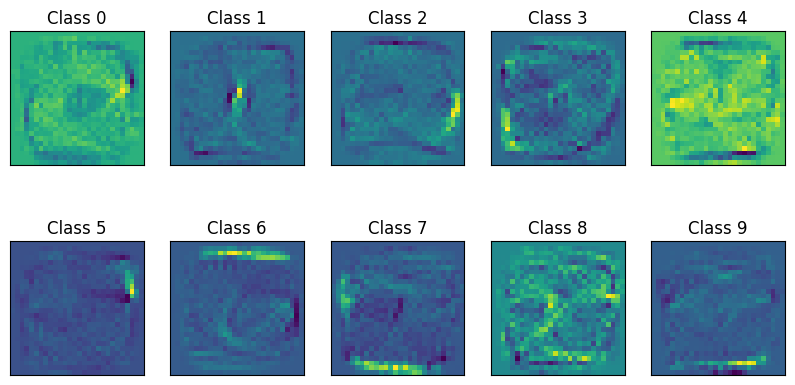

In [ ]:
# Only for the MNIST dataset
# weights = model.coef_.copy() # Run this command for the RidgeClassifier
weights = model1.coef_.copy() # Run this command for the RidgeClassifierCV
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = weights[i,:].reshape([28,28])
    plt.title(f'Class {i}')
    plt.imshow(weight, cmap='viridis')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

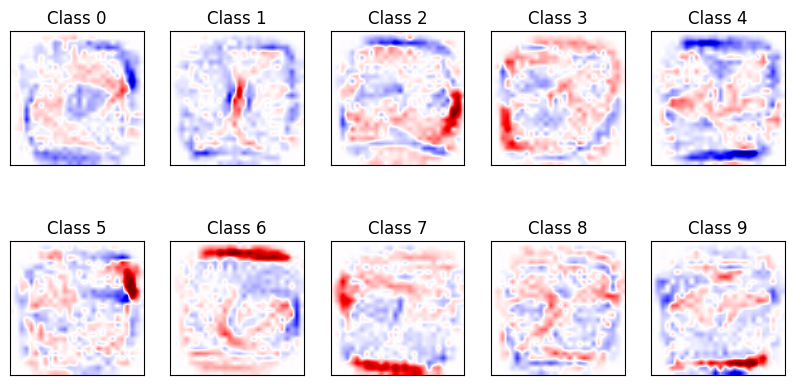

In [ ]:
# Only for the MNIST dataset
# weights = model.coef_.copy() # Run this command for the RidgeClassifier
weights = model1.coef_.copy() # Run this command for the RidgeClassifierCV
scale = np.abs(weights).max()
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = weights[i,:].reshape([28,28])
    plt.title(f'Class {i}')
    plt.imshow(weight, cmap=plt.cm.seismic, vmin=-scale/2, vmax=scale/2, interpolation='bilinear')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

<font color="green">
Atividade (a) <br>
(a)	Qual é a diferença entre a estratégia de regularização do PC01 e a estratégia de regularização do PC02 (célula 3 ou célula 6)? <br>
</font>

Resposta:<br>
A estratégia de regularização é a mesma em ambos PC01 e PC02, que é penalizar  a função de custo proporcionalmente ao quadrado da norma do vetor de pesos (normalização l2). A diferença entre o PC02 e PC01 é que no PC02 foi utilizada validação cruzada, e no PC01 a busca pelo 'c' ótimo foi feita sempre com o mesmo conjunto de treino e validação.
  


<font color="green">
Atividade (b) <br>
Quais são as principais diferenças entre RidgeClassifier e RidgeClassifierCV? <br> </font>

Links relevantes: <BR>
[RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html) <br>
[RidgeClassifierCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifierCV.html)

Resposta:<br>
RidgeClasssifierCV é um caso especial de RidgeClassifier onde o conjunto de validação (CV siginifica cross validation) é embutido no método, o conjunto de validação são amostras de dados não usadas para treinar o modelo mas para avaliar o modelo a fim de se avaliar overfitting. <br>
Adicionalmente o RidgeClassifierCV também aceita uma lista de parâmetros de regularização para teste, enquanto o RidgeClassifier aceita apenas um valor.

## Execute o mesmo notebook, a seguir, com adaptações para a base CIFAR-10.

In [ ]:
from keras.datasets import cifar10

(Xp, y), (Xtp, yt) = cifar10.load_data()
Xa = Xp.reshape(Xp.shape[0], 3072)
Xta = Xtp.reshape(Xtp.shape[0], 3072)
y = y.ravel()
yt = yt.ravel()
X = Xa / 255.0
Xt = Xta / 255.0

print("Shape of X: ".ljust(10),  X.shape)
print("Shape of y: ".ljust(10),  y.shape)
print("Shape of Xt: ".ljust(10),  Xt.shape)
print("Shape of yt: ".ljust(10),  yt.shape)

170498071/170498071 [==============================] - 2s 0us/step
Shape of X:  (50000, 3072)
Shape of y:  (50000,)
Shape of Xt:  (10000, 3072)
Shape of yt:  (10000,)


In [ ]:
# Dataset balancing analysis
from tensorflow.keras.utils import to_categorical
import plotly.express as px

yy = to_categorical(y)
yyt = to_categorical(yt)
sum_along_columns1 = np.sum(yy, axis = 0)
print(sum_along_columns1)
sum_along_columns2 = np.sum(yyt, axis = 0)
print(sum_along_columns2)
fig1 = px.bar(x=range(10),y=sum_along_columns1, width=600, height=400,
              labels=dict(x="Class", y="Number of examples"), title="<b>Number of examples per class in the training dataset</b>")
fig1.update_layout(xaxis = dict(tickmode = 'linear', dtick = 1), title_x=0.5)
fig1.show()
fig2 = px.bar(x=range(10),y=sum_along_columns2, width=600, height=400,
              labels=dict(x="Class", y="Number of examples"), title="<b>Number of examples per class in the test dataset</b>")
fig2.update_layout(xaxis = dict(tickmode = 'linear', dtick = 1), title_x=0.5)
fig2.show()

[5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.]
[1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]


##**A classifier with ridge regularization**


In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier()
# Define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# Evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# Report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.370 (0.004)


In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

model.fit(X,y)
print(f"Performance on the test data: {model.score(Xt,yt)} \n")
cf1 = confusion_matrix(model.predict(Xt),yt)
confusion_matrix_df = pd.DataFrame(cf1)
confusion_matrix_df


Performance on the test data: 0.3781 



,0,1,2,3,4,5,6,7,8,9
0,485,64,120,67,69,51,28,51,145,61
1,60,466,50,77,45,63,67,69,84,196
2,26,20,221,78,116,87,74,53,10,17
3,22,29,71,175,58,134,92,44,22,24
4,19,27,106,51,250,60,95,62,9,18
5,28,32,77,187,91,307,73,92,36,27
6,23,49,162,169,180,106,460,55,19,50
7,55,49,90,64,118,83,42,426,23,60
8,198,81,62,52,31,63,26,54,539,95
9,84,183,41,80,42,46,43,94,113,452


In [ ]:
cf2 = confusion_matrix(model.predict(Xt),yt, normalize='true')
confusion_matrix_df = pd.DataFrame(cf2)
confusion_matrix_df

,0,1,2,3,4,5,6,7,8,9
0,0.425066,0.056091,0.105171,0.058720,0.060473,0.044698,0.024540,0.044698,0.127082,0.053462
1,0.050977,0.395922,0.042481,0.065421,0.038233,0.053526,0.056924,0.058624,0.071368,0.166525
2,0.037037,0.028490,0.314815,0.111111,0.165242,0.123932,0.105413,0.075499,0.014245,0.024217
3,0.032787,0.043219,0.105812,0.260805,0.086438,0.199702,0.137109,0.065574,0.032787,0.035768
4,0.027260,0.038737,0.152080,0.073171,0.358680,0.086083,0.136298,0.088953,0.012912,0.025825
5,0.029474,0.033684,0.081053,0.196842,0.095789,0.323158,0.076842,0.096842,0.037895,0.028421
6,0.018068,0.038492,0.127258,0.132757,0.141398,0.083268,0.361351,0.043205,0.014925,0.039277
7,0.054455,0.048515,0.089109,0.063366,0.116832,0.082178,0.041584,0.421782,0.022772,0.059406
8,0.164863,0.067444,0.051624,0.043297,0.025812,0.052456,0.021649,0.044963,0.448793,0.079101
9,0.071307,0.155348,0.034805,0.067912,0.035654,0.039049,0.036503,0.079796,0.095925,0.383701


##**Another classifier with ridge regularization**

In [ ]:
from sklearn.linear_model import RidgeClassifierCV

c_values = [pow(2,d) for d in range(-10, 19, 2)] # Range goes up to 19 to ensure search up to 2^18
model1 = RidgeClassifierCV(alphas=c_values)
model1.fit(X,y)
print(f"Performance on the test data: {model1.score(Xt,yt)} \n")
cf3 = confusion_matrix(model1.predict(Xt),yt)
confusion_matrix_df = pd.DataFrame(cf3)
confusion_matrix_df

Performance on the test data: 0.4078 



,0,1,2,3,4,5,6,7,8,9
0,509,58,132,64,72,53,27,65,145,64
1,52,522,57,84,44,75,62,70,77,207
2,24,6,193,67,91,77,50,43,4,10
3,18,23,69,187,53,112,66,44,16,14
4,19,14,110,38,266,58,75,63,2,8
5,23,25,77,200,76,337,63,71,38,21
6,30,39,189,162,204,103,549,43,19,48
7,50,53,75,48,124,71,44,455,16,47
8,192,87,58,60,31,74,24,41,573,94
9,83,173,40,90,39,40,40,105,110,487


In [ ]:
cf4 = confusion_matrix(model1.predict(Xt),yt, normalize='true')
confusion_matrix_df = pd.DataFrame(cf4)
confusion_matrix_df

,0,1,2,3,4,5,6,7,8,9
0,0.428091,0.048780,0.111018,0.053827,0.060555,0.044575,0.022708,0.054668,0.121951,0.053827
1,0.041600,0.417600,0.045600,0.067200,0.035200,0.060000,0.049600,0.056000,0.061600,0.165600
2,0.042478,0.010619,0.341593,0.118584,0.161062,0.136283,0.088496,0.076106,0.007080,0.017699
3,0.029900,0.038206,0.114618,0.310631,0.088040,0.186047,0.109635,0.073090,0.026578,0.023256
4,0.029096,0.021440,0.168453,0.058193,0.407351,0.088821,0.114855,0.096478,0.003063,0.012251
5,0.024705,0.026853,0.082707,0.214823,0.081633,0.361976,0.067669,0.076262,0.040816,0.022556
6,0.021645,0.028139,0.136364,0.116883,0.147186,0.074315,0.396104,0.031025,0.013709,0.034632
7,0.050865,0.053917,0.076297,0.048830,0.126144,0.072228,0.044761,0.462869,0.016277,0.047813
8,0.155592,0.070502,0.047002,0.048622,0.025122,0.059968,0.019449,0.033225,0.464344,0.076175
9,0.068766,0.143331,0.033140,0.074565,0.032312,0.033140,0.033140,0.086993,0.091135,0.403480


In [ ]:
print(c_values)
print(f'alpha_: {model1.alpha_}')

[0.0009765625, 0.00390625, 0.015625, 0.0625, 0.25, 1, 4, 16, 64, 256, 1024, 4096, 16384, 65536, 262144]
alpha_: 1024.0


##**Visualization tools for unveiling the classification strategy**

(10, 3072)


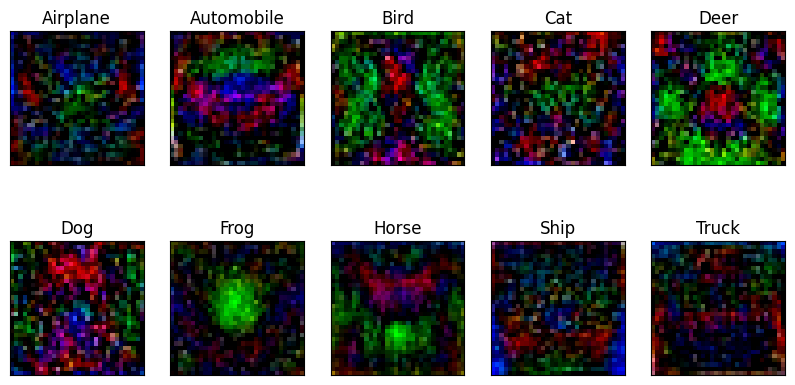

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(10, 5))
weights = model1.coef_.copy()
print(weights.shape)
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight1 = weights[i,:].reshape([32,32,3])
    weight1 *= 1.0/weight1.max()
    weight2 = np.clip(weight1, 0, 1)
    plt.title(classes[i])
    plt.imshow(weight2)
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

<font color="green">
Atividade (c) <br>
Observando as figuras logo acima, informe qual é a estratégia adotada pelo classificador RidgeClassifierCV para a base CIFAR-10. <br>
</font>

Resposta: <br>
Como comentado na resposta anterior, o RidgeClassifierCV usou uma validação cruzada do tipo 'leave-one-out'. O algoritmo construiu 10 classificadores, que separam cada uma das classes das demais classes. Desta forma, os pesos foram definidos de forma que o produto interno dos pixels das imagens com os pesos seja maximizado para a classe correta, por exemplo, para uma imagem na entrada do modelo, o produto interno será diferente para diferetes pesos do modelo, sendo tão maior quanto for semelhante e tão menor quanto for diferente. As figuras dos pesos associados às classes 'frog' e 'horse' apresentam contornos 'parecidos' com as figuras que buscam. A variabilidade das posições e cores de cada objeto dificultam uma melhor resposta do classificador.

<font color="green">
Atividade (d) <br>
Comparando os dois conjuntos de dados (MNIST e CIFAR-10), o que pode sustentar a grande perda de desempenho verificada para o caso da base CIFAR-10? <br>
</font>

Resposta: <br>
A complexidade das imagens da cada dataset explica a perda de desempenho, há muito mais informações contidas em cada imagem do dataset CIFAR-10, por causa disso, para a rede neural é mais difícil estabelecer relações entre features.<br>
 O dataset MNIST é relativamente muito menos complexo, ele consiste de imagens de dígitos escritos à mão em resolução 28px28p (784 variáveis) com fundo mais simples, representando objetos em duas dimensões, as classes do dataset são os dígitos de 0 a 9; já o dataset CIFAR-10 são imagens mais complexas com fundo de diversos cenáris e de resolução 32px32p (3072) representando ojetos em 3 dimensões, as classes do dataset CIFAR-10 são: aviões, carros, pássaros, gatos, veados, cães, sapos, cavalos, navios e caminhões.